# Seattle area house price prediction 

# Part 1: Exploratory Data Analysis


In this project, I will use a dataset of house sales in Seattle area. 
The dataset was scraped from king county website using a Python library called "scrapy".
Just for the purpose of proving the project is viable, I obtain all 21 variables for 21613 house sale records, spanning from May 2014 to May 2015. For future time-series analysis in order to perform house price prediction, more histogrical data for the house sale will need to be scraped as well.  


## 1. Preparation


In [22]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
sns.set_style('whitegrid') 
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats, linalg

import folium # for map visualization
from folium import plugins


from sklearn import linear_model 
from sklearn import neighbors 
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

from math import log

### Read the data


In [23]:
data = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['zipcode'] = data['zipcode'].astype(str)
data = data.sort('date')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [97]:
data.shape

(21613, 21)

In [7]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0,21613.0,21613.0,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,5.0,12.0,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,NaN,98103,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450.0,19489.0,14031.0,8981.0,NaN,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,NaN,NaN,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,NaN,NaN,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,NaN,NaN,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,NaN,NaN,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000


## map visualization


Plotting out differences in house sale accross the county, by grouping the dataframe by
1. zipcode,
2. Compute the average price of each column
3. add a column with the total number of house sales

In [5]:
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

data['count'] = 1

count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
zipcode_data.head(2)

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.664787e+09,280804.690608,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.30902,-122.270646,1828.856354,11214.403315,362
1,98002,4.850894e+09,234284.035176,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.30878,-122.213357,1479.030151,7585.482412,199


Overlay the result onto zipcode json map data

In [28]:
filepath = 'zipcode_king_county.geojson'

In [52]:
def show_zipcode_map(col):
    geo_path = filepath
    zipcode = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=9)
    zipcode.choropleth(geo_path = geo_path,
                     data=zipcode_data, 
                     columns = ['zipcode', col], key_on = 'feature.properties.ZCTA5CE10',
                 fill_color='OrRd', fill_opacity=0.9,line_opacity=0.2)
    zipcode.save(col + '.html') # save to current folder

    return zipcode

In [53]:
show_zipcode_map('count')

In [42]:
show_zipcode_map('price')
show_zipcode_map('sqft_living')
#show_zipcode_map('yr_built')

## 2. Associations and Correlations between Variables

### 2.1 Continuous Variables


In [ ]:
# For the 1st Plot, combine the map+mean_price (see the disparities between the different zipcodes. 
# The location of the houses should play an important role in our regression model.)
# and map+number_of_sale
# and map+sqft_living

# We can see that on average, the houses on the eastern suburbs of Seattle are more expensive. 
# They are also bigger in sqft.
# The houses close to the metropolitan are of Seattle are relatively old compare to the houses in the rural area.

In [24]:
# create two new columns in the data frame

data['sqft_basement2'] = data['sqft_basement'].apply(lambda x: x if x > 0 else None)
data['yr_renovated2'] = data['yr_renovated'].apply(lambda x: x if x > 0 else None)

#  create two more new columns in our dataset.
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) # Indicate whether there is a basement or not
data['basement_present'] = data['basement_present'].astype('category', ordered = False)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) # if the house has been renovated
data['renovated'] = data['renovated'].astype('category', ordered = False)


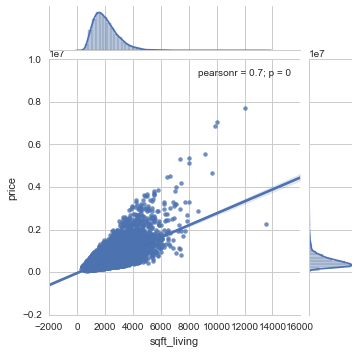

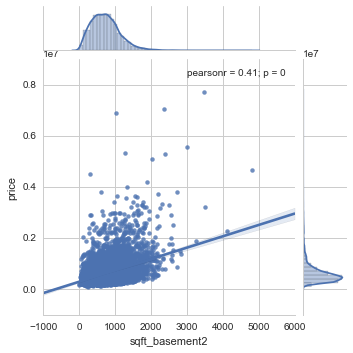

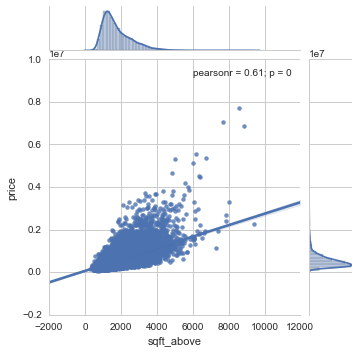

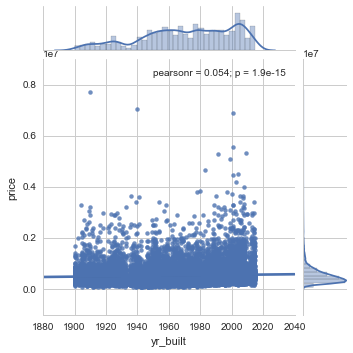

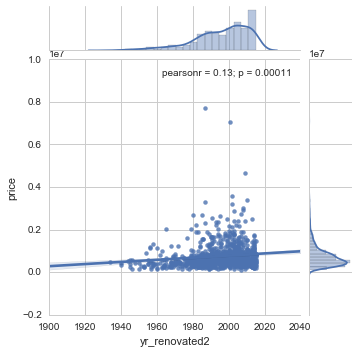

In [25]:
# Show the new plots with paerson correlation
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement2", y="price", data=data, kind = 'reg', dropna=True, size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated2", y="price", data=data, kind = 'reg', dropna=True, size = 5)

plt.show()

In [56]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,renovated
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320,0,0
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,1,0
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,0,0
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,1,0
16594,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0,0,5,8,2440,1310,1924,0,98115,47.6747,-122.303,2170,4590,1,0


### 2.2 Discrete Variables


Check the ordinal variables and asses their association with house price. 
distribution of the categories of each variable using boxplots are displayed.

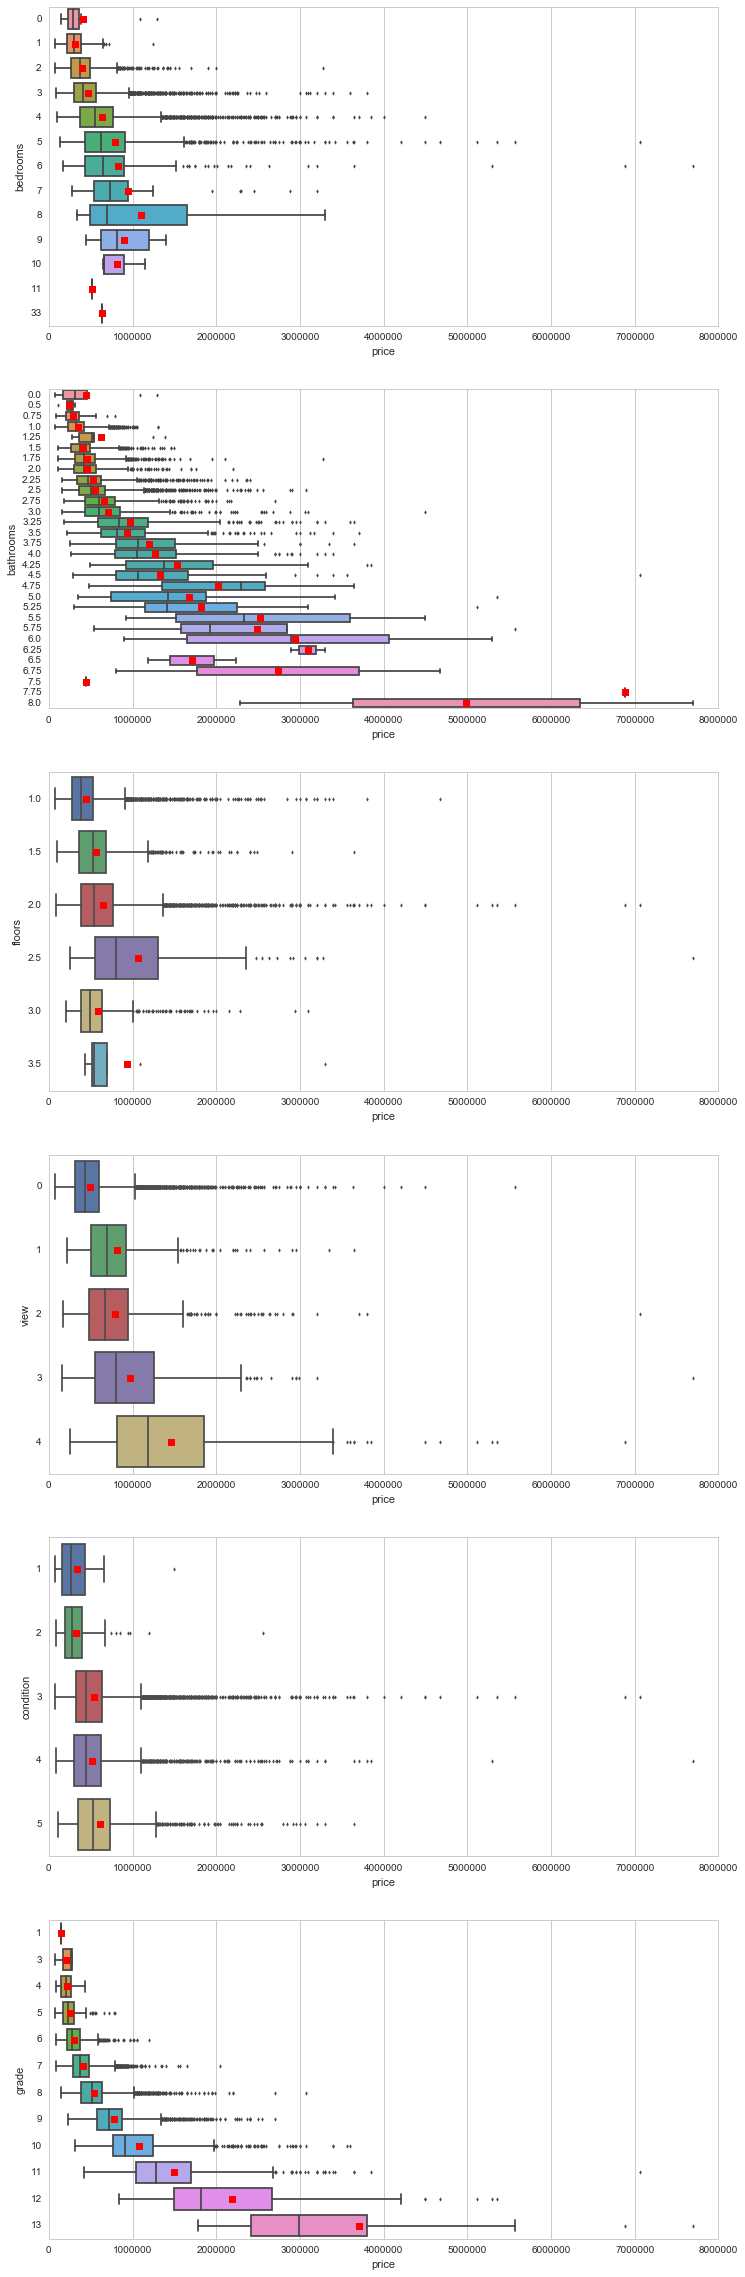

In [26]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

Measure the strength and direction of the relationships between house price and these variables.

In [27]:
r, p = stats.spearmanr(data['bedrooms'], data['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['bathrooms'], data['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['floors'], data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['view'], data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['condition'], data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['grade'], data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.34465237096 with p = 0.0
spearman correlation r between price and bathrooms is 0.497160350811 with p = 0.0
spearman correlation r between price and floors is 0.322346550036 with p = 0.0
spearman correlation r between price and view is 0.29393116417 with p = 0.0
spearman correlation r between price and condition is 0.0184899583013 with p = 0.00656082840655
spearman correlation r between price and grade is 0.658215221426 with p = 0.0


My observation:
1. sqft_living, sqft_above and sqft_basement were moderately/strongly associated with price. Paerson r was equal to 0.70, 0.61 and 0.41, respectively. 
2. Five of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price.

# Part 2: Multiple Regression to predict house sale price 

In [ ]:
data.drop(['id', 'date'], axis = 1, inplace = True) # don't need id and date for the following analysis

In [76]:
categorial_cols = ['floors', 'view', 'condition', 'grade']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

In [84]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_present,renovated,floors#1.0,floors#1.5,floors#2.0,floors#2.5,floors#3.0,floors#3.5,view#0,view#1,view#2,view#3,view#4,condition#1,condition#2,condition#3,condition#4,condition#5,grade#1,grade#3,grade#4,grade#5,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,0,1970,0,1977,0,47.4635,-121.991,2340,35100,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,0,1700,900,1951,0,47.6833,-122.400,2380,4750,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,0,2820,0,1979,0,47.5794,-122.025,2820,48351,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,0,3310,0,2012,0,47.5150,-121.870,2380,5000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,0,1080,1080,1966,0,47.5443,-122.177,1850,9000,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# I will only encode the 6 most expensive zipcodes as shown in the map.

dummies_zipcodes = pd.get_dummies(data['zipcode'], drop_first=False)
dummies_zipcodes.reset_index(inplace=True)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}#".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040']]
data.drop('zipcode', axis=1, inplace=True)
data = data.join(dummies_zipcodes)

data.dtypes

id                           int64
date                datetime64[ns]
price                      float64
bedrooms                     int64
bathrooms                  float64
sqft_living                  int64
sqft_lot                     int64
waterfront                category
sqft_above                   int64
sqft_basement                int64
yr_built                     int64
yr_renovated                 int64
lat                        float64
long                       float64
sqft_living15                int64
sqft_lot15                   int64
basement_present             int64
renovated                    int64
floors#1.0                 float64
floors#1.5                 float64
floors#2.0                 float64
floors#2.5                 float64
floors#3.0                 float64
floors#3.5                 float64
view#0                     float64
view#1                     float64
view#2                     float64
view#3                     float64
view#4              

### Split the data

Split the dataframe into training and testing data using a 80%/20% ratio

In [86]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(data, train_size = 0.8, random_state = 10)

## Regression Models

I will train numerous regression models on the train data (e.g., simple linear regression, ridge, lasso)and evaluate their performance using Root Mean Squared Error (RMSE) on the test data.

### Simple Linear Regression



In [87]:
# A function that take one input of the dataset and return the RMSE (of the test data), and the intercept and coefficient
def simple_linear_model(train, test, input_feature):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = [input_feature]), train.as_matrix(columns = ['price'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['price']), 
                              regr.predict(test.as_matrix(columns = [input_feature])))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

Run the same test on all the features in the dataset and assess which one would be the best estimator of house price using just a single linear regression model.

In [88]:
input_list = data.columns.values.tolist() # list of column name
input_list.remove('price')
simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

# loop that calculate the RMSE of the test data for each input 
for p in input_list:
    RMSE, w1, w0 = simple_linear_model(train_data, test_data, p)
    simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                       ,ignore_index=True)
simple_linear_result.sort_values('RMSE').head(10) # display the 10 best estimators

,feature,RMSE,intercept,coefficient
2,sqft_living,252870.779142,284.782073,-51986.148701
5,sqft_above,279535.639723,271.337525,54870.294297
11,sqft_living15,281706.108284,316.625068,-88717.082423
1,bathrooms,298632.513284,252044.028830,7182.872232
21,view#0,327314.436321,-449877.911487,946599.632934
40,grade#11,328549.274601,974198.455880,521693.324608
39,grade#10,328979.217450,560229.614321,510429.374786
25,view#4,330805.830805,928808.586986,526529.629549
0,bedrooms,331297.575051,119698.147641,135838.309025
6,sqft_basement,332885.058055,272.231451,461013.846313


When using simple linear regression, sqft_living provides the smallest test error estimate of house price for the dataset considered.

### Multiple Regression

Predict *price* using multiple features. 

In [89]:
# first adding more features into the dataset.

# sqft_living cubed
train_data['sqft_living_cubed'] = train_data['sqft_living'].apply(lambda x: x**3) 
test_data['sqft_living_cubed'] = test_data['sqft_living'].apply(lambda x: x**3) 

# bedrooms_squared: this will mostly affect houses with many bedrooms.
train_data['bedrooms_squared'] = train_data['bedrooms'].apply(lambda x: x**2) 
test_data['bedrooms_squared'] = test_data['bedrooms'].apply(lambda x: x**2)

#"interaction" feature: large when both of bd and bathroom are large.
train_data['bed_bath_rooms'] = train_data['bedrooms']*train_data['bathrooms']
test_data['bed_bath_rooms'] = test_data['bedrooms']*test_data['bathrooms']

# log of squarefeet tend to bring large values closer together and spreading out small values.
train_data['log_sqft_living'] = train_data['sqft_living'].apply(lambda x: log(x))
test_data['log_sqft_living'] = test_data['sqft_living'].apply(lambda x: log(x))

train_data.shape

(17290, 54)

### Ridge Regression

Ridge regression: adding a 2-norm of the coefficients.  The result is penalizing fits with large coefficients. 

I use a ridge regression with an implemented cross-validation method from the scikit learn library. By default, it performs Leave-One-Out cross-validation.

In [91]:
input_feature = train_data.columns.values.tolist() # list of column name
input_feature.remove('price')

ridgeCV = linear_model.RidgeCV(alphas = np.linspace(1.0e-10,1,num = 100), normalize = True, store_cv_values = True) # initialize the model
ridgeCV.fit(train_data.as_matrix(columns = input_feature), train_data.as_matrix(columns = ['price'])) # fit the train data
print ('best alpha is: %s' %ridgeCV.alpha_) # get the best alpha
print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']), 
                              ridgeCV.predict(test_data.as_matrix(columns = [input_feature])))**0.5) # predict price and test error

best alpha is: 0.0303030304
test error (RMSE) is: 213302.533482


Using every features in the dataset and a ridge regression model with an efficient  LOO cross-validation method yield a test error of 171567.

### Lasso Regression

Lasso regression: takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients. It shrinks coefficients to avoid overfitting, and  performs feature selection by setting some coefficients to 0 for sufficiently large penalty strength alpha. 


In [94]:
for i in [0.01,0.1,1,250,500,1000]:
    lasso = linear_model.Lasso(alpha = i, normalize = True) # initialize the model
    lasso.fit(train_data.as_matrix(columns = input_feature), train_data.as_matrix(columns = ['price'])) # fit the train data
    print (lasso.sparse_coef_.getnnz) # number of non zero weights
    print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']), 
                              lasso.predict(test_data.as_matrix(columns = [input_feature])))**0.5) # predict price and test error

<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>>
test error (RMSE) is: 217502.561153
<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 51 stored elements in Compressed Sparse Row format>>
test error (RMSE) is: 217457.348433
<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>>
test error (RMSE) is: 217457.511515
<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>>
test error (RMSE) is: 243714.552946
<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>>
test error (RMSE) is: 256496.3352
<bound method _cs_matrix.getnnz of <1x53 sparse matrix of type '<class 'numpy.float

Then I perform cross-validation methods that select the best *alpha* to provide the best predictive accuracy. 

In [93]:
lassoCV = linear_model.LassoCV(normalize = True) # initialize the model (alphas are set automatically)
lassoCV.fit(train_data.as_matrix(columns = input_feature), np.ravel(train_data.as_matrix(columns = ['price']))) # fit the train data
print ('best alpha is: %s' %lassoCV.alpha_) # get the best alpha
print ('number of non zero weigths is: %s' %np.count_nonzero(lassoCV.coef_)) # number of non zero weights
print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']), 
                              lassoCV.predict(test_data.as_matrix(columns = [input_feature])))**0.5) # predict price and test error

best alpha is: 6.50132195733
number of non zero weigths is: 39
test error (RMSE) is: 217717.704305
